In [8]:
!pip install nltk
!pip install gensim

In [9]:
#importação de bibliotecas
import nltk
import urllib
import bs4 as bs
import re 
from gensim.models  import Word2Vec
import pandas as pd
import numpy as np

In [10]:
#download nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopword')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading stopword: Package 'stopword' not found in
[nltk_data]     index


False

In [11]:
#importar base de dados 

comentarios = pd.read_csv("./magalu_2022_n/tweets.csv", delimiter = ",", encoding='UTF-8')

In [12]:
comentarios['tweet']

0       Churrasqueira a Carvão Portátil com Ventilador...
1       [Magazine Luiza] Xbox Series S 2020 Nova Geraç...
2       @magazineluiza tô querendo comprar uma mesa pa...
3       @magazineluiza Consegue aquele cupom de descon...
4                              @magazineluiza Respondi lá
                              ...                        
1867    @magazineluiza Pois é, por isso mesmo fiquei d...
1868    ⚠️ Alerta de oferta - Magazine Luiza 🗣️  ↪️ Li...
1869    @magazineluiza @Anitta Dá um cupom pra mim magalu
1870                           @magazineluiza Desconto100
1871    @magazineluiza legal, né? pra vender e cobrar ...
Name: tweet, Length: 1872, dtype: object

In [13]:
comentarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1872 non-null   int64  
 1   conversation_id  1872 non-null   int64  
 2   created_at       1872 non-null   object 
 3   date             1872 non-null   object 
 4   time             1872 non-null   object 
 5   timezone         1872 non-null   int64  
 6   user_id          1872 non-null   int64  
 7   username         1872 non-null   object 
 8   name             1872 non-null   object 
 9   place            3 non-null      object 
 10  tweet            1872 non-null   object 
 11  language         1872 non-null   object 
 12  mentions         1872 non-null   object 
 13  urls             1872 non-null   object 
 14  photos           1872 non-null   object 
 15  replies_count    1872 non-null   int64  
 16  retweets_count   1872 non-null   int64  
 17  likes_count   

In [14]:
nltk.download("webtext")

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\Fabio\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\webtext.zip.


True

In [15]:
#transformar a coluna manifestação em uma lista 

col_one_list = comentarios['tweet'].tolist()
texto = str(col_one_list)

In [16]:
texto

'[\'Churrasqueira a Carvão Portátil com Ventilador - Nell GB-PC1 PR com Assadeira (cód. magazineluiza 228864300) Vendido e entregue por Magalu de  R$ 423,58 por R$ 370,00  ou em 8x de R$ 46,25 sem juros Comprar:  https://t.co/iNJFTu2RI9?  https://t.co/FaFyakRu1R\', \'[Magazine Luiza] Xbox Series S 2020 Nova Geração 512GB SSD- 1 Controle Branco Microsoft R$ 2229,00 #desconto #oferta #promocao #xbox  https://t.co/pyV1cxaUiK\', \'@magazineluiza tô querendo comprar uma mesa para escritório, mas preciso de um cupom de desconto, cadê ? \\U0001f979\\U0001f979\', \'@magazineluiza Consegue aquele cupom de desconto maravilhoso pra comprar essa maravilha com vcs?  https://t.co/3CL5qspSHp\', \'@magazineluiza Respondi lá\', \'Torneira para Cozinha Gourmet de Mesa Dupla Nell - F-02 CRO Prata (cód. magazineluiza 231138700) Vendido e entregue por Magalu de  R$ 524,99 por R$ 400,00  ou em 8x de R$ 50,00 sem juros Comprar:  https://t.co/yEClMDvIaJ?  https://t.co/HjtGV1eDdr\', \'@magazineluiza chama o Lu

In [19]:
#converter lista para texto 
moby_tokens = nltk.word_tokenize(texto)
text1 = nltk.Text(moby_tokens)
text1

<Text: [ 'Churrasqueira a Carvão Portátil com Ventilador -...>

In [22]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Fabio\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [23]:
#total de termos no documento
from nltk.stem import WordNetLemmatizer

def total_termos():

    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(w,'v') for w in text1]

    return len(set(lemmatized))

total_termos()

7631

In [24]:
#importar bibliotecas bigram 
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.corpus import stopwords

In [25]:
#encontrar bigrams por token 

procurar = BigramCollocationFinder.from_words(moby_tokens)

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fabio\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [27]:
#retira stopwords
retira = set(stopwords.words('portuguese'))

In [28]:
filtra = lambda w: len(w) <3 or w in retira 

In [29]:
procurar.apply_word_filter(filtra)

In [30]:
#bigram 
procurar.nbest(BigramAssocMeasures.likelihood_ratio, 60)

[('Magazine', 'Luiza'),
 ('magazine', 'luiza'),
 ('magazine', 'Luiza'),
 ('Nova', 'Geração'),
 ("'🚨Oferta", 'Magazine'),
 ('2020', 'Nova'),
 ('MAGAZINE', 'LUIZA'),
 ('algumas', 'regiões'),
 ('Gabriel', 'Monteiro'),
 ('📦FRETE', 'GRÁTIS'),
 ("'Magazine", 'Luiza'),
 ('Xbox', 'Series'),
 ('Aragão', 'Pinterest'),
 ('Força', 'Gio'),
 ('Gio', 'Renato'),
 ('Pinterest', 'Pfizer'),
 ('Renato', 'Aragão'),
 ('Controle', 'Branco'),
 ('1TB', 'SSD'),
 ('Branco', 'Sony'),
 ('época', 'cosméticos'),
 ('tudo', 'bem'),
 ('Geração', '1TB'),
 ('Geração', '825GB'),
 ("'EBS", 'Propaganda'),
 ('criança', 'vulnerável'),
 ('GRÁTIS', '📌Vendido'),
 ('dias', 'úteis'),
 ('alguma', 'coisa'),
 ('Controle', 'Preto'),
 ('frete', 'grátis'),
 ('pra', 'mim'),
 ('nota', 'fiscal'),
 ('⭐⭐⭐⭐⭐', 'Menor'),
 ('São', 'Paulo'),
 ('diz', 'CEO'),
 ('Menor', 'preço'),
 ("'Xbox", 'Series'),
 ('documentos', 'referentes'),
 ('Preto', 'Microsoft'),
 ('magazineluiza', 'Compraria'),
 ("'⚠️", 'Alerta'),
 ('promocao', 'https'),
 ('Compra', 'J

In [31]:
#quais são os termos mais frequentes 
def termos_frequentes():
  dist = nltk.FreqDist(text1)
  vocab1= dist.keys()
  freqwords = [w for w in vocab1 if len(w) > 3 and dist[w] >2]
  return sorted(freqwords)
termos_frequentes()

["'Acabou",
 "'Box",
 "'Como",
 "'Comprei",
 "'EBS",
 "'Fiz",
 "'Gente",
 "'Kit",
 "'Magazine",
 "'Nossa",
 "'Nunca",
 "'Não",
 "'Ola",
 "'PS5",
 "'PlayStation",
 "'Que",
 "'Queda",
 "'Tem",
 "'Xbox",
 "'alô",
 "'comprei",
 "'gente",
 "'magazine",
 "'meu",
 "'nossa",
 "'não",
 "'que",
 "'🚨Oferta",
 '....',
 '//t.co/0ckNslhMYl',
 '//t.co/8vrFpgBrNq',
 '//t.co/VEK17OKO9X',
 '//t.co/w4DQWn8rwQ',
 '//t.co/ycTuk9SFle',
 '0800',
 '08bits',
 '09:33',
 '2020',
 '2022',
 '28.3',
 '287,88',
 '59,90',
 '69,90',
 '825GB',
 '911Literatura',
 'AGORA',
 'AMER3',
 'Acho',
 'Acreditamos',
 'Acredito',
 'Agora',
 'Ainda',
 'Ajuda',
 'Alerta',
 'Amazon',
 'Americanas',
 'Anitta',
 'Aqui',
 'Aragão',
 'Assim',
 'BRAP4',
 'Bandido',
 'Black',
 'Bolsonaro',
 'Bonecos',
 'Bora',
 'Bradespar',
 'Branco',
 'Brasil',
 'BuserBrasil',
 'COMPRA',
 'COMPRAR',
 'CYRE3',
 'Cadeira',
 'Cama',
 'CasasBahia',
 'Caso',
 'Colecionáveis',
 'Coloquei',
 'Como',
 'Compra',
 'Comprar',
 'Compraria',
 'Compre',
 'Comprei',
 'C

In [32]:
dist = nltk.FreqDist(text1)
vocab1 = dist.keys()
freqwords = [w for w in vocab1 if len(w) > 3 and dist[w] >2]
total = str(freqwords)

In [34]:
!pip install WordCloud

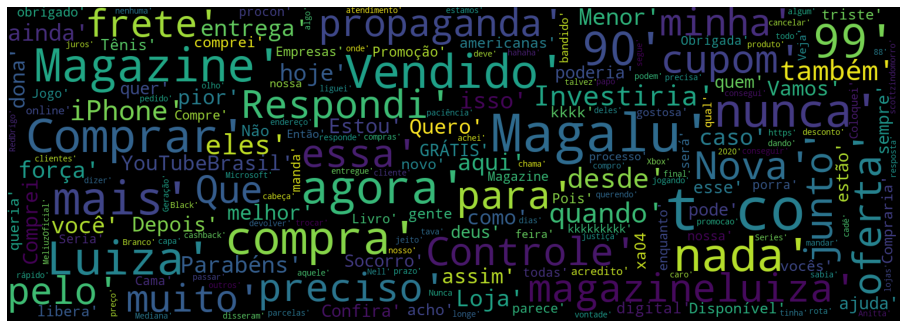

In [35]:
#wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=100, width=1520, height=535).generate(total)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Cluster

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comentarios["tweet"])

In [38]:
X = normalize(X)

In [39]:
kmeans = KMeans(
    n_clusters=8,
    n_init=15,
    max_iter=450,
    init = 'k-means++'
    


)

In [40]:
#treinar 

kmeans.fit(X)

KMeans(max_iter=450, n_init=15)

In [41]:
comentarios['cluster'] = kmeans.labels_
comentarios

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,cluster
0,1509681451796774915,1509681451796774915,2022-03-31 20:58:01 Hora oficial do Brasil,2022-03-31,20:58:01,-300,915672772269002752,brotherjp21,JP CUPOM%,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,7
1,1509680716900098056,1509680716900098056,2022-03-31 20:55:06 Hora oficial do Brasil,2022-03-31,20:55:06,-300,1324387343508426755,promos_follower,"Promoções, ofertas e descontos",NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,7
2,1509679781478113283,1509679781478113283,2022-03-31 20:51:23 Hora oficial do Brasil,2022-03-31,20:51:23,-300,1367851925581013001,bliitzturner,Ana vai ver o harry e não vai me levar :(,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0
3,1509678913571758083,1509678913571758083,2022-03-31 20:47:56 Hora oficial do Brasil,2022-03-31,20:47:56,-300,86151869,wagnerlc,Wagner Lacerda,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0
4,1509674281797623822,1509591357597306890,2022-03-31 20:29:31 Hora oficial do Brasil,2022-03-31,20:29:31,-300,237827013,saarahroosa,sarah 🌹,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'magazineluiza', 'name': 'Lu ...",NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,1507761408590684166,1507745516645462027,2022-03-26 13:48:27 Hora oficial do Brasil,2022-03-26,13:48:27,-300,1453430856824115201,1l2pf,Um tal Luiz,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'magazineluiza', 'name': 'Lu ...",NaN,NaN,NaN,NaN,5
1868,1507761065018507273,1507761065018507273,2022-03-26 13:47:05 Hora oficial do Brasil,2022-03-26,13:47:05,-300,1202002439005769728,promocoespa,Promoções de livros 📖,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,7
1869,1507761060819918851,1507324766394454020,2022-03-26 13:47:04 Hora oficial do Brasil,2022-03-26,13:47:04,-300,1468982872178573326,felps1500,F£L¶$,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'magazineluiza', 'name': 'Lu ...",NaN,NaN,NaN,NaN,4
1870,1507760949213732870,1507720627129659395,2022-03-26 13:46:37 Hora oficial do Brasil,2022-03-26,13:46:37,-300,870092055736922112,pontinhoazul1,PontinhoAzul,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'magazineluiza', 'name': 'Lu ...",NaN,NaN,NaN,NaN,3


In [42]:
comentarios['cluster'].value_counts(normalize=True)

3    0.318376
0    0.177350
6    0.120726
5    0.109509
7    0.093483
4    0.080128
1    0.055556
2    0.044872
Name: cluster, dtype: float64

In [43]:
cluster0 = comentarios[comentarios['cluster']==0]
cluster1 = comentarios[comentarios['cluster']==1]
cluster2 = comentarios[comentarios['cluster']==2]
cluster3 = comentarios[comentarios['cluster']==3]
cluster4 = comentarios[comentarios['cluster']==4]
cluster5 = comentarios[comentarios['cluster']==5]
cluster6 = comentarios[comentarios['cluster']==6]
cluster7 = comentarios[comentarios['cluster']==7]


Nuvem de plavras Cluster 0

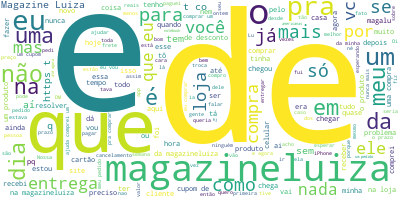

In [44]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster0['tweet'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Cluster 1

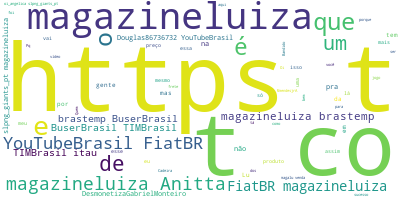

In [45]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster1['tweet'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Cluster 2

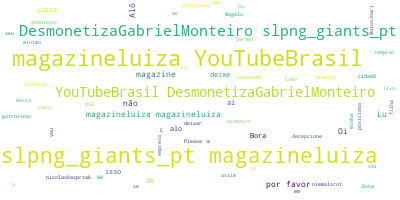

In [46]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster2['tweet'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Cluster 3

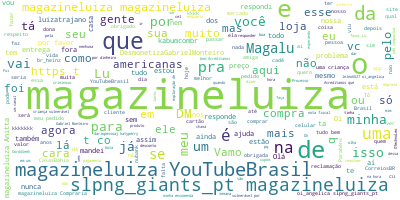

In [47]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster3['tweet'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Cluster 4


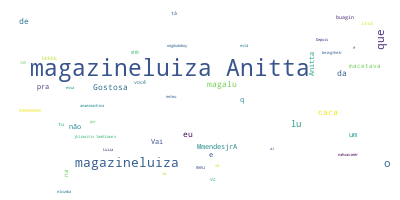

In [48]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster4['tweet'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Cluster 5

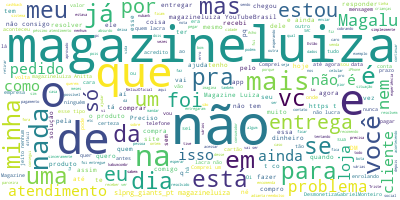

In [49]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster5['tweet'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Cluster 6

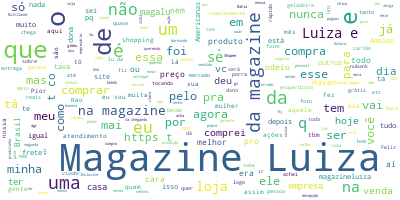

In [50]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster6['tweet'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Cluster 7 

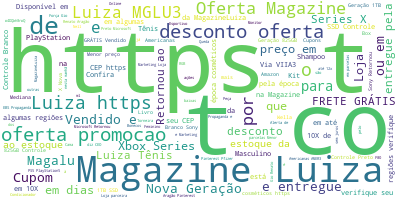

In [51]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster7['tweet'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()